# Resnet-18

# Using CASIA-FASD

>> model loaded: Result-28-0.0033.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           29393           1034
actual_real(1)             333           9629

EER: 0.0337	HTER: 0.0337
>> finished


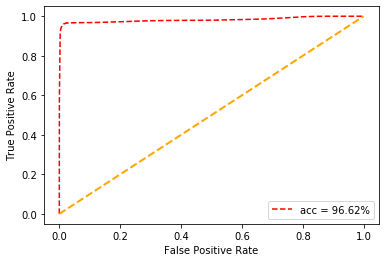

<Figure size 432x288 with 0 Axes>

In [2]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\CASIA-FASD\\001\\Result-28-0.0033.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\CASIA-FASD\\001\\001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: Result-07-0.0027.hdf5
>>>> evaluating on 'CASIA-FASD'
Found 40389 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           29328           1099
actual_real(1)             361           9601

EER: 0.0361	HTER: 0.0362
>> finished


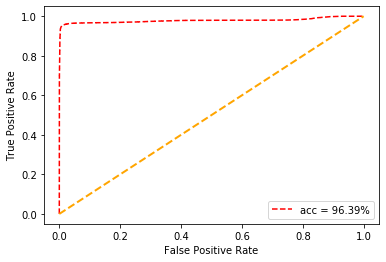

<Figure size 432x288 with 0 Axes>

In [3]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'CASIA-FASD'
    testDB = 'CASIA-FASD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\CASIA-FASD\\01\\Result-07-0.0027.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\CASIA-FASD\\01\\01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# Using MSU-MFSD

>> model loaded: Result-17-0.0027.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           31131            769
actual_real(1)             260          10537

EER: 0.0241	HTER: 0.0241
>> finished


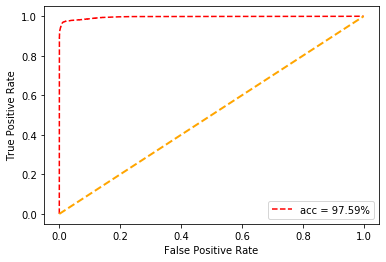

<Figure size 432x288 with 0 Axes>

In [4]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\MSU-MFSD\\001\\Result-17-0.0027.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\MSU-MFSD\\001\\001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: Result-12-0.0007.hdf5
>>>> evaluating on 'MSU-MFSD'
Found 42697 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           31029            871
actual_real(1)             296          10501

EER: 0.0274	HTER: 0.0274
>> finished


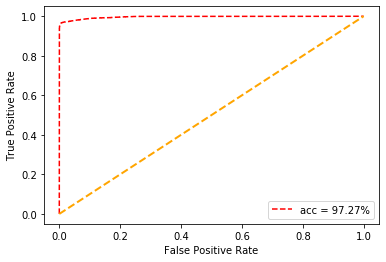

<Figure size 432x288 with 0 Axes>

In [5]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'MSU-MFSD'
    testDB = 'MSU-MFSD'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\MSU-MFSD\\01\\Result-12-0.0007.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\MSU-MFSD\\01\\01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# Using NUAA-PI

>> model loaded: Result-13-0.0390.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8854 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            5204            346
actual_real(1)             208           3096

EER: 0.0627	HTER: 0.0626
>> finished


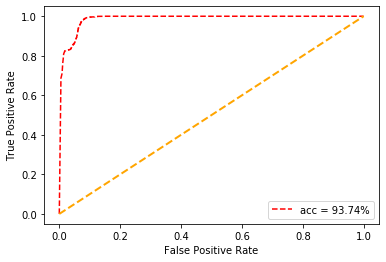

<Figure size 432x288 with 0 Axes>

In [6]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\NUAA-PI\\001\\13\\Result-13-0.0390.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\NUAA-PI\\001\\13\\001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: Result-30-0.0160.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8854 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            5325            225
actual_real(1)             134           3170

EER: 0.0404	HTER: 0.0405
>> finished


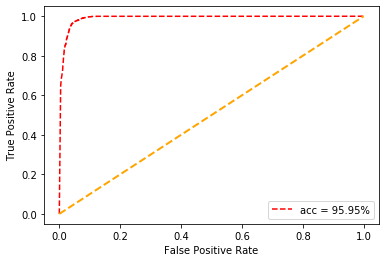

<Figure size 432x288 with 0 Axes>

In [7]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\NUAA-PI\\001\\30\\Result-30-0.0160.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\NUAA-PI\\001\\30\\001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: Result-18-0.0029.hdf5
>>>> evaluating on 'NUAA-PI'
Found 8854 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)            4997            553
actual_real(1)             329           2975

EER: 0.0997	HTER: 0.0996
>> finished


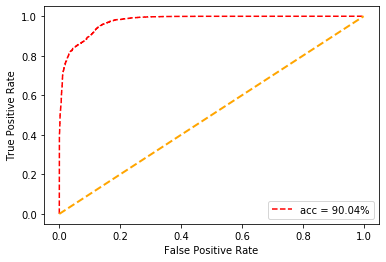

<Figure size 432x288 with 0 Axes>

In [8]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'NUAA-PI'
    testDB = 'NUAA-PI'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\NUAA-PI\\01\\Result-18-0.0029.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
#     val_datagen = ImageDataGenerator(rescale=1.0/255.0)
#     val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
#                                                       target_size=(inputSize, inputSize),
#                                                       batch_size=batchSize,
#                                                       class_mode='binary',
#                                                       interpolation='bilinear',
#                                                       shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
#     y_true = val_generator.classes
#     y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

#     # EER
#     fpr, tpr, threshold = roc_curve(y_true, y_score)
#     fnr = 1 - tpr
#     eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
#     val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\NUAA-PI\\01\\01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(test_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

# Using REPLAY-ATTACK

>> model loaded: REPLAY-ATTACK-19-0.0029.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 90725 images belonging to 2 classes.
Found 119650 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           91615            111
actual_real(1)              34          27890

EER: 0.0001	HTER: 0.0012
>> finished


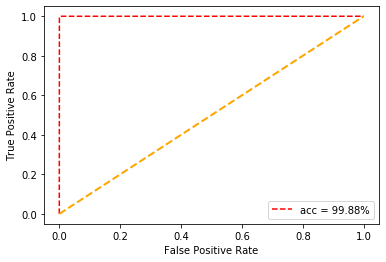

<Figure size 432x288 with 0 Axes>

In [9]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\REPLAY-ATTACK\\001\\REPLAY-ATTACK-19-0.0029.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
    val_datagen = ImageDataGenerator(rescale=1.0/255.0)
    val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
    y_true = val_generator.classes
    y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

    # EER
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\REPLAY-ATTACK\\001\\001.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()

>> model loaded: REPLAY-ATTACK-14-0.0028.hdf5
>>>> evaluating on 'REPLAY-ATTACK'
Found 90725 images belonging to 2 classes.
Found 119650 images belonging to 2 classes.
                  pred_fake(0)   pred_real(1)
actural_fake(0)           91469            257
actual_real(1)              79          27845

EER: 0.0002	HTER: 0.0028
>> finished


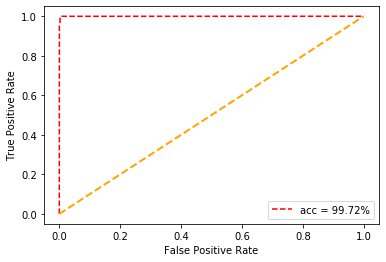

<Figure size 432x288 with 0 Axes>

In [10]:
# 학습된 모델 테스트셋에서 성능 평가
# 얼굴 스푸핑 분야에서 평가 metric으로 HTER이랑 EER 두 개 주로 사용
# =========================================

import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import roc_curve, confusion_matrix

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras import backend as k

%matplotlib inline

def main():
    inputSize = 224
    batchSize = 16
    
    trainDB = 'REPLAY-ATTACK'
    testDB = 'REPLAY-ATTACK'
    
    dataDir = 'C:\\Users\\prlab\\Desktop\\bjy\\crop_result'
    modelPath = 'C:\\Users\\prlab\\Desktop\\bjy\\trained_model_Result\\REPLAY-ATTACK\\01\\REPLAY-ATTACK-14-0.0028.hdf5'
    
    print('>> model loaded: {}'.format(os.path.basename(modelPath)))
    K.clear_session()
    model = load_model(modelPath)
        
    print(">>>> evaluating on '{}'".format(testDB))
    
    val_datagen = ImageDataGenerator(rescale=1.0/255.0)
    val_generator = val_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'val']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)
    
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_generator = test_datagen.flow_from_directory(os.path.join(*[dataDir, testDB, 'test']),
                                                      target_size=(inputSize, inputSize),
                                                      batch_size=batchSize,
                                                      class_mode='binary',
                                                      interpolation='bilinear',
                                                      shuffle=False,)

    ''' evaluating EER '''
    y_true = val_generator.classes
    y_score = model.predict_generator(val_generator, steps=len(val_generator)).ravel()

    # EER
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    val_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    ''' evaluating HTER '''
    y_true = test_generator.classes
    y_score = model.predict_generator(test_generator, steps = len(test_generator)).ravel()

    # Calculate EER threshold
    fpr, tpr, threshold = roc_curve(y_true, y_score)
    fnr = 1 - tpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr-fpr)))]
    
    test_eer = (fpr[np.nanargmin(np.absolute((fnr - fpr)))] + fnr[np.nanargmin(np.absolute((fnr - fpr)))]) / 2

    # HTER
    y_pred = y_score > eer_threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    labels = test_generator.class_indices
    print('                  pred_fake({})   pred_real({})\nactural_fake({})    {:12d}   {:12d}\nactual_real({})    {:12d}   {:12d}\n'.format(labels['Fake'], labels['Real'], labels['Fake'], tn, fp, labels['Real'], fn, tp))
    hter = (fp/(tn+fp) + fn/(fn+tp)) * 0.5

    # ROC curve
    Accuracy = ((tn+tp) / (tn+fp+fn+tp)) * 100.0

    roc_auc = roc_auc_score(y_true, y_score)

    plt.figure()
    lw = 2

    plt.plot(fpr, tpr, 'r--', label='acc = %0.2f%%' % Accuracy)
    plt.plot([0, 1], [0, 1], color = 'orange', lw=lw, linestyle='--')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = "lower right")

    plt.savefig('C:\\Users\\prlab\\Desktop\\bjy\\1_intra_database\\REPLAY-ATTACK\\01\\01.png')
    plt.figure()
    
    print('EER: {:.4f}\tHTER: {:.4f}'.format(val_eer, hter))

    print('>> finished')

        
if __name__ == '__main__':
    main()